In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt

#import statistics as st
ROOT.gStyle.SetOptStat(000000)

Welcome to JupyROOT 6.28/02


In [2]:
import subprocess
import sys

def install_package(package_name):
    # Install the package using subprocess to call pip
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

package_name = "pickle5"  # Replace with the package you want to install

try:
    import requests  # Replace with the module name of the package
except ImportError:
    print(f"{package_name} not found. Installing...")
    install_package(package_name)
    import requests  # Import again after installation

def import_packages():
    try:
        import mplhep  # Replace with the module name of the package
    except ImportError:
        print(f"{'mplhep'} not found. Installing...")
        install_package("mplhep")
        import mplhep  # Import again after installation
    try:
        import hist  # Replace with the module name of the package
    except ImportError:
        print(f"{'hist'} not found. Installing...")
        install_package("hist")
        import hist  # Import again after installation
    try:
        import pickle  # Replace with the module name of the package
    except ImportError:
        print(f"{'pickle5'} not found. Installing...")
        install_package("pickle5")
        import pickle  # Import again after installation
        
import_packages()

In [3]:
# mbinsGen  = array.array('d', [0,5,10,20,40,60,80,100,150,200,250,300,350,1000] )
# mbinsDet  = array.array('d', [0,2.5,5,7.5,10,15,20,30,40,50,60,70,80,90,100,125,150,175,200,225,250,275,300,325,350,675,1000])
# ptbinsGen = array.array('d', [200,260,350,460,550,650,760,13000])
#ptbinsDet = array.array('d', [200,260,350,460,550,650,760,13000])

mbinsGen  = array.array('d',[0, 10, 20, 40, 60, 80, 100, 150, 200, 13000] )
mbinsDet  = array.array('d', [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 6200, 13000])
ptbinsGen = array.array('d', [0,170, 200, 260, 350, 460, 13000])
ptbinsDet = array.array('d', [0,170,200, 260, 350, 460, 13000])


nmbinsGen  = len(mbinsGen) -1
nmbinsDet  = len(mbinsDet) -1
nptbinsGen = len(ptbinsGen) -1
nptbinsDet = len(ptbinsDet) -1

In [4]:
generatorBinning = ROOT.TUnfoldBinning("generator")
### Need coarser binning for signal
signalBinning = generatorBinning.AddBinning("signal")    
signalBinning.AddAxis("massgen",nmbinsGen,mbinsGen,
                        False, # needed for fakes
                        False # overflow bin
                        )
signalBinning.AddAxis("ptgen",nptbinsGen,ptbinsGen,
                        False, # needed for fakes
                        False # overflow bin
                        )

# X axis : generator binning is Signal : mgen * ptgen and Background : mrec * ptrec

xaxis =  array.array('d',[a for a in range(nmbinsGen *nptbinsGen + 1 )])
nx = len(xaxis)-1

print (xaxis)
print("There are {} (signal) generator level bins in the simple scheme".format(nx))
print("---------------------------------------------------------------")

print("signalBinning")
for i in range(len(signalBinning.GetDistributionBinning(0))):
    print (signalBinning.GetDistributionBinning(0)[i])

#print "detectorBinning"
#for i in xrange(len(backgroundBinning.GetDistributionBinning(0))):
#    print backgroundBinning.GetDistributionBinning(0)[i]
    
#print "Below counts include overflow and underflow bins"    
#print "There are {} signal {} background bins in the generator scheme".format(signalBinning.GetTH1xNumberOfBins() , backgroundBinning.GetDistributionNumberOfBins())
genBin = generatorBinning

array('d', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0])
There are 54 (signal) generator level bins in the simple scheme
---------------------------------------------------------------
signalBinning
0.0
10.0
20.0
40.0
60.0
80.0
100.0
150.0
200.0
13000.0


In [5]:
detectorBinning = ROOT.TUnfoldBinning("detector") 
detectorDistribution=detectorBinning.AddBinning("detectordistribution")
detectorDistribution.AddAxis("mass",nmbinsDet,mbinsDet,
                        False, # no underflow bin (not reconstructed)
                        False # overflow bin
                        )
detectorDistribution.AddAxis("pt",nptbinsDet,ptbinsDet,
                        False, # no underflow bin (not reconstructed)
                        False # overflow bin
                        )

yaxis =  array.array('d',[a for a in range(nmbinsDet *nptbinsDet+1 )])
ny = len(yaxis)-1

print (yaxis)
print ("There are {}  detector level bins in the simple scheme".format(ny))
print ("detectorBinning")
for i in range(len(detectorDistribution.GetDistributionBinning(0))):
    print (detectorDistribution.GetDistributionBinning(0)[i])
    
print ("Below counts include overflow and underflow bins")
print ("There are {} bins in the detector scheme".format(detectorDistribution.GetTH1xNumberOfBins()))#GetDistributionNumberOfBins())
detBin  = detectorBinning

array('d', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0])
There are 108  detector level bins in the simple scheme
detectorBinning
0.0
5.0
10.0
15.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
125.0
150.0
175.0
200.0
6200.0
13000.0
Below counts include overflow and underflow bins
There are 108 bins in the detector scheme


In [6]:
import pickle as pkl
with open("qjetmass_zjets_gen__all_syst_v2.pkl", "rb") as f:
    output = pkl.load( f )
with open("qjetmass_zjets_reco_v2.pkl", "rb") as f:
    output_data = pkl.load( f )
    
    
with open("pkl_files/jackknife_output0to4_real.pkl", "rb") as f:
    output0to4 = pkl.load( f )
    
with open("pkl_files/jackknife_output_5to9.pkl", "rb") as f:
    output5to9 = pkl.load( f )

In [7]:
with open("pt170-13000.pkl", 'rb') as f:
    output0to9 = pkl.load(f)

In [8]:
ptreco_center = output['response_matrix_g'].axes[1].centers
ptreco_width = output['response_matrix_g'].axes[1].widths

ptgen_center = output['response_matrix_g'].axes[3].centers
ptgen_width = output['response_matrix_g'].axes[3].widths
mreco_center = output['response_matrix_g'].axes[2].centers
mreco_edge = output['response_matrix_g'].axes[2].edges
mgen_center = output['response_matrix_g'].axes[4].centers

mreco_width = output['response_matrix_g'].axes[2].widths
mgen_width = output['response_matrix_g'].axes[4].widths


In [9]:
M = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,"M")


h = detectorBinning.CreateHistogram("h")

hup = detectorBinning.CreateHistogram("hup")
hdn = detectorBinning.CreateHistogram("hdn")



htrue = generatorBinning.CreateHistogram("htrue")
htruef = detectorBinning.CreateHistogram("htruef")

In [10]:
output0to4['jackknife_response_u'][{"jk": 0}]

Hist(
  StrCategory(['UL16NanoAODv9', 'UL17NanoAODv9', 'UL18NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  Regular(77, 0, 77, name='bin_gen', label='Generator'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  Regular(162, 0, 162, name='bin_reco', label='Detector'),
  storage=Weight()) # Sum: WeightedSum(value=146507, variance=45548.4) (WeightedSum(value=146507, variance=45548.4) with flow)

In [11]:
# M_np = output['tunfold_migration_u'][{'systematic':'nominal'}].project("bin_gen","bin_reco").values(flow = True)
# M_np_error = output['tunfold_migration_u'][{'systematic':'nominal'}].project("bin_gen","bin_reco").variances(flow = True)

# h_np = output_data['tunfold_reco_u'][{'systematic':'nominal'}].project("bin_reco").values(flow = True)
# h_np_error = output_data['tunfold_reco_u'][{'systematic':'nominal'}].project("bin_reco").variances(flow = True)

# htrue_np = output['tunfold_migration_u'][{'systematic':'nominal'}].project("bin_gen").values(flow = True)
# htrue_np_error = output['tunfold_migration_u'][{'systematic':'nominal'}].project("bin_gen").variances(flow = True)

# jk_dic = {}

# for i in range(10):
#     if (i<5):

#         Msyst = output0to4['jackknife_response_u'][{"jk": i}].project("bin_gen","bin_reco").view(flow=True).value
#         jk_dic.update({str(i):Msyst})

        
        
# M_np = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen","bin_reco").values(flow = True)
# M_np_error = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen","bin_reco").variances(flow = True)

# h_np = output_data['tunfold_reco_g'][{'systematic':'nominal'}].project("bin_reco").values(flow = True)
# h_np_error = output_data['tunfold_reco_g'][{'systematic':'nominal'}].project("bin_reco").variances(flow = True)

# htrue_np = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen").values(flow = True)
# htrue_np_error = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen").variances(flow = True)

# jk_dic = {}

# for i in range(10):
#     if (i<5):

#         Msyst = output0to4['jackknife_response_g'][{"jk": i}].project("bin_gen","bin_reco").view(flow=True).value
#         jk_dic.update({str(i):Msyst})
#     else:
#         Msyst = output5to9['jackknife_response_g'][{"jk": i-5}].project("bin_gen","bin_reco").view(flow=True).value
#         jk_dic.update({str(i):Msyst})

In [12]:
closure = True
groomed = False

In [43]:
if groomed == False:
    jk_dic = {}
    for i in range(10):
        print(i)
        Msyst = output0to9['jk_response_matrix_u'][{"jk": i}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value
        jk_dic.update({str(i):Msyst})
        
    matrix_combined = np.stack(list(jk_dic.values()), axis = 0)
    rms = np.std(matrix_combined, axis = 0)
    rms = np.sqrt(10/9)*rms
    
    M_np = output['response_matrix_u'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value
    M_np_error = rms



    n_bin_det = M_np.shape[2]*M_np.shape[3]
    n_bin_gen =  M_np.shape[0]*M_np.shape[1]


    if closure:
        h_np = output['ptjet_mjet_u_reco'][{"systematic": "nominal"}].project("mreco","ptreco").view(flow=True).value
        h_np_error = output['ptjet_mjet_u_reco'][{"systematic": "nominal"}].project("mreco","ptreco").view(flow=True).variance
        h_np_error = np.sqrt(h_np_error)
    else:
        h_np = output['ptjet_mjet_u_reco'][{"systematic": "nominal"}].project("mreco","ptreco").view(flow=True).value
        h_np_error = output['ptjet_mjet_u_reco'][{"systematic": "nominal"}].project("mreco","ptreco").view(flow=True).variance
        h_np_error = np.sqrt(h_np_error)

    # htrue_np = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value, (2,3))
    # htrue_np_error = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).variance, (2,3))
    # htrue_np_error = np.sqrt(htrue_np_error)

    htrue_np =output['response_matrix_u'][{"systematic": "nominal"}].project("mgen","ptgen").view(flow=True).value
    htrue_np_error = output['response_matrix_u'][{"systematic": "nominal"}].project("mgen","ptgen").view(flow=True).variance
    htrue_np_error = np.sqrt(htrue_np_error)

    

    


0
1
2
3
4
5
6
7
8
9


In [58]:
if groomed:
    
    
    jk_dic = {}
    for i in range(10):
        print(i)
        Msyst = output0to9['jk_response_matrix_g'][{"jk": i}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value
        jk_dic.update({str(i):Msyst})
        
    matrix_combined = np.stack(list(jk_dic.values()), axis = 0)
    rms = np.std(matrix_combined, axis = 0)
    rms = np.sqrt(10/9)*rms
    
    M_np = output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value
    M_np_error = rms
    



    n_bin_det = M_np.shape[2]*M_np.shape[3]
    n_bin_gen =  M_np.shape[0]*M_np.shape[1]


    if closure:
        h_np = output['ptjet_mjet_g_reco'][{"systematic": "nominal"}].project("mreco","ptreco").view(flow=True).value
        h_np_error = output['ptjet_mjet_g_reco'][{"systematic": "nominal"}].project("mreco","ptreco").view(flow=True).variance
        h_np_error = np.sqrt(h_np_error)
    else:
        h_np = output['ptjet_mjet_g_reco'][{"systematic": "nominal"}].project("mreco","ptreco").view(flow=True).value
        h_np_error = output['ptjet_mjet_g_reco'][{"systematic": "nominal"}].project("mreco","ptreco").view(flow=True).variance
        h_np_error = np.sqrt(h_np_error)

    # htrue_np = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value, (2,3))
    # htrue_np_error = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).variance, (2,3))
    # htrue_np_error = np.sqrt(htrue_np_error)

    htrue_np =output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen").view(flow=True).value
    htrue_np_error = output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen").view(flow=True).variance
    htrue_np_error = np.sqrt(htrue_np_error)



In [59]:
output['response_matrix_u'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco")

Hist(
  Variable([0, 10, 20, 40, 60, 80, 100, 150, 200, 13000], name='mgen', label='Mass (GeV)'),
  Variable([170, 200, 260, 350, 460, 13000], name='ptgen', label='p_{T,RECO} (GeV)'),
  Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 6200, 13000], name='mreco', label='m_{RECO} (GeV)'),
  Variable([170, 200, 260, 350, 460, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=32589.7, variance=1918.56) (WeightedSum(value=35003.8, variance=2189.7) with flow)

In [60]:
jk_dic['0'].shape

(11, 7, 20, 7)

In [61]:
np.sum(output0to4['jackknife_response_u'][{"jk": 0}].project("bin_gen","bin_reco").values())

146506.61068266886

In [62]:
np.sum(h_np)

35003.8346086744

In [63]:
166689*(0.9)

150020.1

In [64]:
M.GetNbinsX()

54

In [65]:
list_reco = []
list_gen = []
integral = 0
for i in range(M_np.shape[0]-2): #mgen
    for j in range(M_np.shape[1]-1): #ptgen
        for k in range(M_np.shape[2]-2): #mreco
            for l in range(M_np.shape[3]-1): #ptreco
                
                mgen = mgen_center[i]
                if j == 0:
                    ptgen = 1
                else:
                    ptgen = ptgen_center[j-1]
                mreco = mreco_center[k]
                if l == 0:
                    ptreco = 1
                else:
                    ptreco = ptreco_center[l-1]
    
                # glob_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[k], ptreco_center[l])
                # glob_gen = signalBinning.GetGlobalBinNumber(mgen_center[i], ptgen_center[j])
                glob_reco = detectorDistribution.GetGlobalBinNumber(mreco, ptreco)
                glob_gen = signalBinning.GetGlobalBinNumber(mgen, ptgen)
                #rint(glob_gen, glob_reco)
                # list_reco.append(glob_reco)
                # list_gen.append(glob_gen)
                integral = integral + M_np[i+1][j][k+1][l]
                M.SetBinContent(glob_gen, glob_reco, M_np[i+1][j][k+1][l])
                M.SetBinError( glob_gen, glob_reco, M_np_error[i+1][j][k+1][l])
print(integral)                
jk_dic_root = {}                      
for i_jk in range(10):  
    jk_dic_root.update({str(i_jk): ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,str(i_jk))})
    for i in range(M_np.shape[0]-2): #mgen
        for j in range(M_np.shape[1]-1): #ptgen
            for k in range(M_np.shape[2]-2): #mreco
                for l in range(M_np.shape[3]-1): #ptreco
                    
                    mgen = mgen_center[i]
                    if j == 0:
                        ptgen = 1
                    else:
                        ptgen = ptgen_center[j-1]
                    mreco = mreco_center[k]
                    if l == 0:
                        ptreco = 1
                    else:
                        ptreco = ptreco_center[l-1]

                    glob_reco = detectorDistribution.GetGlobalBinNumber(mreco, ptreco)
                    glob_gen = signalBinning.GetGlobalBinNumber(mgen, ptgen)
                    jk_dic_root[str(i_jk)].SetBinContent(glob_gen, glob_reco, jk_dic[str(i_jk)][i+1,j,k+1,l])
                    #jk_dic_root[str(i_jk)].SetBinError(glob_gen, glob_reco, resp_syst_dic_np_error[sys][i+1,j,k+1,l])
                
for j in range(M_np.shape[1]-1): #ptgen                
    for i in range(M_np.shape[0]-2): #mgen  

        mgen = mgen_center[i]
        if j == 0:
            ptgen = 1
        else:
            ptgen = ptgen_center[j-1]
        
        glob_gen = signalBinning.GetGlobalBinNumber(mgen, ptgen)
        
        htrue.SetBinContent(glob_gen, htrue_np[i+1][j])
        htrue.SetBinError(glob_gen, htrue_np_error[i+1][j])
        
for l in range(M_np.shape[3]-1): #ptreco           
    for k in range(M_np.shape[2]-2): #mreco    
        mreco = mreco_center[k]
        if l == 0:
            ptreco = 1
        else:
            ptreco = ptreco_center[l-1]
        glob_reco = detectorDistribution.GetGlobalBinNumber(mreco, ptreco)
        #print(glob_reco)
        h.SetBinContent(glob_reco, h_np[k+1][l])
        h.SetBinError(glob_reco, h_np_error[k+1][l])

35003.79350473463


Warning in <TROOT::Append>: Replacing existing TH1: 0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 7 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 9 (Potential memory leak).


In [110]:
ptgen_center_uf = np.insert(ptgen_center, 0, -5)
mgen_center_uf = np.insert(ptgen_center, 0, -5)
ptreco_center_uf = np.insert(ptreco_center, 0, -5)
mgen_width_uf = np.insert(mgen_width, 0, 1)
mgen_width_f = np.insert(mgen_width_uf, -1, 10000)
mreco_width_uf = np.insert(mreco_width, 0, 1)


def NormM(M, mode = 'gen'):
    if mode == 'gen':
        print("Normalising in GEN axis")
        M_norm = M.Clone("M_norm")
        for pt in ptgen_center_uf:
            start_gen = signalBinning.GetGlobalBinNumber(-1,pt)
            end_gen = signalBinning.GetGlobalBinNumber(mgen_center_uf[-1]+10000,pt)
            # print(start_gen)
            # print(end_gen)
            # print(end_gen-start_gen)
            binsum = M.Integral(start_gen, end_gen, 0, M.GetNbinsY()+1)
            print(binsum)
            im = 0
            for ix in range(start_gen, end_gen+1):
                for iy in range(0, M.GetNbinsY()+1):
                    if binsum>0:
                        M_norm.SetBinContent(ix, iy, M.GetBinContent(ix, iy)/(binsum*mgen_width_f[im]) )
                im+=1
        return M_norm
    if mode == 'reco':
        print("Normalising in RECO axis")
        M_norm = M.Clone("M_norm")
        for pt in ptreco_center_uf:
            start_reco = detectorDistribution.GetGlobalBinNumber(-1,pt)
            end_reco = detectorDistribution.GetGlobalBinNumber(mgen_center_uf[-1]+10000,pt)
            # print(start_reco)
            # print(end_reco)
            # print(end_reco-start_reco)
            binsum = M.Integral( 0, M.GetNbinsX()+1, start_reco, end_reco)
            print(binsum)
            im = 0
            for ix in range(0, M.GetNbinsX()+1):
                for iy in range(start_reco, end_reco+1):
                    if binsum>0:
                        M_norm.SetBinContent(ix, iy, M.GetBinContent(ix, iy)/(binsum) )
                im+=1
        return M_norm

def NormOutput(h):
    h_norm = h.Clone("M_norm")
    for pt in ptgen_center_uf:
        start_gen = signalBinning.GetGlobalBinNumber(-1,pt)
        end_gen = signalBinning.GetGlobalBinNumber(mgen_center[-1]+10000,pt)
        
        binsum = h.Integral(start_gen, end_gen)
        print(binsum)
        im = 0
        for ix in range(start_gen, end_gen+1):
            if binsum>0:
                h_norm.SetBinContent(ix,  h.GetBinContent(ix)/(binsum*mgen_width_f[im]) )
            im+=1
    return h_norm

def NormInput(h):
    h_norm = h.Clone("M_norm")
    for pt in ptreco_center_uf:
        start_reco = detectorDistribution.GetGlobalBinNumber(-1,pt)
        end_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[-1]+10000,pt)
        binsum = h.Integral(start_reco, end_reco)
        print(binsum)
        im = 0
        for ix in range(start_reco, end_reco):
            if binsum>0:
                h_norm.SetBinContent(ix,  h.GetBinContent(ix)/(binsum*mreco_width_uf[im]) )
            im+=1
    return h_norm

norm = True
if norm:
    mode = 'gen'
    M = NormM(M, mode = mode)
    htrue = NormOutput(htrue)
    h = NormInput(h)
    for key in jk_dic_root.keys():
        jk_dic_root[key] = NormM(jk_dic_root[key], mode = mode )

Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0
Normalising in GEN axis
0.0
0.0
0.0
0.0
0.0
0.0


In [67]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[UOB]"

#u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)
u_list = []
for i in range(10):
    u_list.append(ROOT.TUnfoldDensity(jk_dic_root[str(i)],orientation,regMode,con))

    u_list[i].SetInput(h)


    nScan=50
    tauMin=0.0
    tauMax=0.0
    iBest=0

    logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
    logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
    lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
    u_list[i].ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
    
    

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 10 output bins do not depend on the input data  0 7-9 17-18 26-27 36 55
Info in <TUnfold::TUnfold>: 108 input bins and 46 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:generator[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (xaxis:generator[6.5,7.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (xaxis:generator[7.5,8.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (xaxis:generator[8.5,9.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #17 (xaxis:generator[16.5,17.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #18 (xaxis:generator[17.5,18.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #26 (xaxis:generator[25.5,26.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #27 (xaxis:generator[26.5,27.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #36 (xaxis:generator[35.5,36.5])
Info in <TU

In [68]:
o_list = []
for i in range(10):
    o_list.append( u_list[i].GetOutput("o"+str(i)))

Warning in <TROOT::Append>: Replacing existing TH1: o0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o7 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: o9 (Potential memory leak).


In [72]:
a = u_list[0].GetEmatrixSysUncorr('mat')

In [91]:
o_unc = o_list[0].Clone('unc')
o_unc.Reset()
for i in range(1, o_unc.GetNbinsX()):
    o_unc.SetBinContent(i, o_list[0].GetBinContent(i))
    o_unc.SetBinError(i, a.GetBinContent(i,i)**0.5)

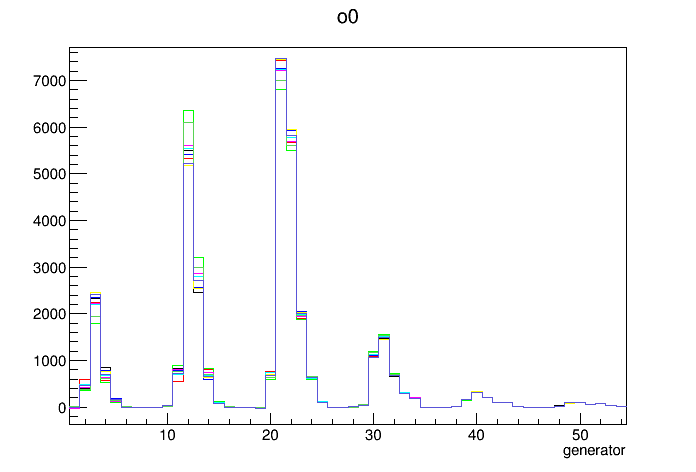

In [92]:
c_output = ROOT.TCanvas()
for i in range(10):
    o_list[i].SetLineColor(i)
    o_list[i].Draw("hist same")
    
c_output.Draw()

In [97]:
%jsroot

In [100]:
c_new = ROOT.TCanvas()
o_unc.SetLineWidth(2)
o_unc.SetFillColor(2)
o_unc.SetFillStyle(2)
o_unc.Draw('e')
c_new.Draw()

In [201]:
bin_avg = []
bin_rms = []
for i_bin in range(o_list[0].GetNbinsX()):
    content_list = []
    for i_jk in range(10):
        content_list.append(o_list[i_jk].GetBinContent(i_bin))
    bin_avg.append(np.mean(content_list) )
    mean_content = np.mean(content_list)
    std = np.std(content_list)
    error = np.sqrt(10/9)*std
    bin_rms.append(error)
        

/tmp/ipykernel_108/1641746775.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(h_np/np.sum(h_np, axis = 0))


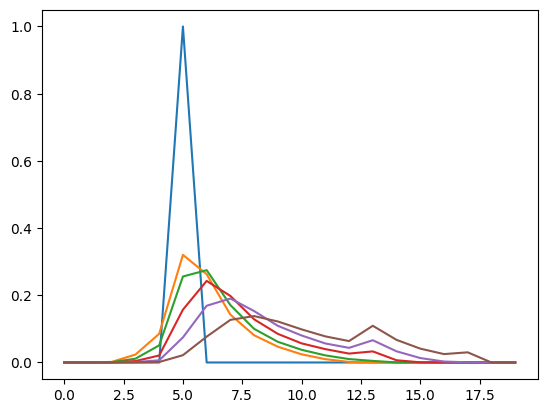

In [114]:
plt.plot(h_np/np.sum(h_np, axis = 0))

In [115]:
np.sum(h_np, axis = 0)

array([4.35382644e-02, 6.11615665e+03, 2.12094510e+04, 5.89519656e+03,
       1.27652568e+03, 5.06461193e+02, 0.00000000e+00])

In [202]:
bin_rms

[0.0,
 17.545310181280183,
 69.05546596107094,
 204.9835268182678,
 96.9408764327293,
 27.88606345154055,
 3.0019954519572676,
 0.0,
 0.0,
 0.0,
 6.979633192427557,
 90.13027936422174,
 372.5235659429548,
 233.23322230641514,
 82.91343683274953,
 17.658802643875994,
 1.2414583319092318,
 0.0,
 0.0,
 11.432602471903545,
 50.33242714089552,
 206.42244678360365,
 153.47551794763422,
 60.38281232694768,
 19.26209191124189,
 3.1613678347537504,
 0.0,
 0.0,
 2.0770443227653477,
 8.772104088830693,
 42.726008470219575,
 33.2288394369535,
 14.363908997853382,
 6.179220754062998,
 2.81868075992233,
 0.2852524142200814,
 0.0,
 0.3524943541306907,
 0.9306119945448997,
 6.071297547883086,
 7.676716323272144,
 2.4511763397534034,
 1.7323970280697418,
 1.022684419220411,
 0.415603487236508,
 0.1684499134291063,
 0.02809932344412453,
 0.40683097287649683,
 1.2224700976904468,
 1.6379113005004848,
 0.8614418156886735,
 0.5473229003650188,
 0.24730809162243567,
 0.17621215616357191]

In [205]:
bin_rms = np.array(bin_rms)
if not groomed:
    np.savetxt('rms_data_u.txt', bin_rms)
else:
    np.savetxt('rms_data_g.txt', bin_rms)

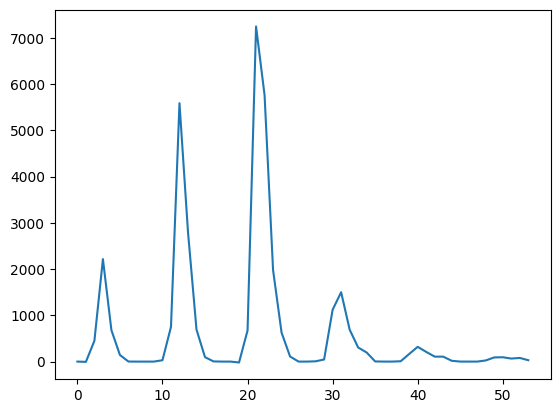

In [204]:
plt.plot(bin_avg)

/tmp/ipykernel_381/2812826202.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(  bin_rms/np.array(bin_avg), marker = 'o')


Text(0, 0.5, 'Bin Error')

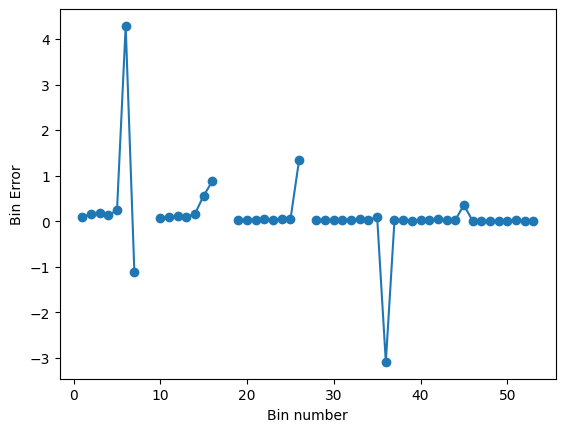

In [186]:
plt.plot(  bin_rms/np.array(bin_avg), marker = 'o')
plt.xlabel('Bin number')
plt.ylabel('Bin Error')

In [59]:
import numpy as np

sample_size = 1000000
data = np.random.normal(loc=0, scale=1, size=sample_size)  

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
standard_error_rms = sample_std / np.sqrt(sample_size)

# Step 3: Calculate Standard Error using 10-fold Jackknife Resampling
k = 10
n = len(data)
subset_size = n // k
jackknife_means = []

for i in range(k):
    start_index = i * subset_size
    end_index = start_index + subset_size if i < k - 1 else n
    jackknife_sample = np.delete(data, np.arange(start_index, end_index))
    jackknife_mean = np.mean(jackknife_sample)
    jackknife_means.append(jackknife_mean)

jackknife_means = np.array(jackknife_means)
mean_jackknife_means = np.mean(jackknife_means)
jackknife_variance = (k - 1) / k * np.sum((jackknife_means - mean_jackknife_means) ** 2)
standard_error_jackknife = np.sqrt(jackknife_variance)

# Step 4: Compare the Results
print("Standard Error using RMS method:", standard_error_rms)
print("Standard Error using 10-fold Jackknife method:", standard_error_jackknife)

Standard Error using RMS method: 0.0010007189603352883
Standard Error using 10-fold Jackknife method: 0.0009843620863746346


In [60]:
jackknife_means

array([ 1.06063901e-04, -7.01322564e-04,  1.71562781e-04, -4.30829451e-06,
       -6.71789093e-04, -4.41172654e-04, -7.75405832e-04, -3.11397108e-04,
       -5.57603386e-04, -4.88913667e-04])

In [85]:
signalBinning.GetGlobalBinNumber(5,261)

35

(0.0, 200.0)

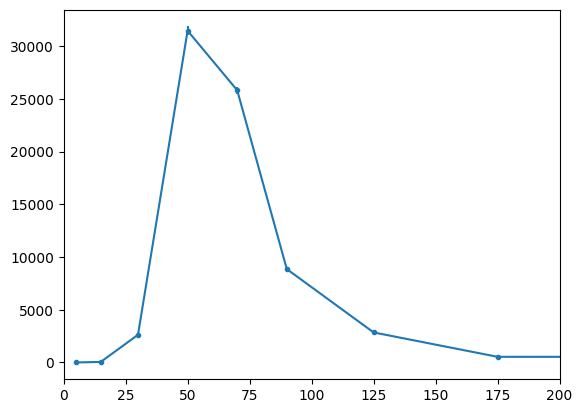

In [87]:
plt.errorbar( mgen_center, bin_avg[23: 32], bin_rms[23: 32], marker = '.')
plt.xlim(0,200)

(0.0, 200.0)

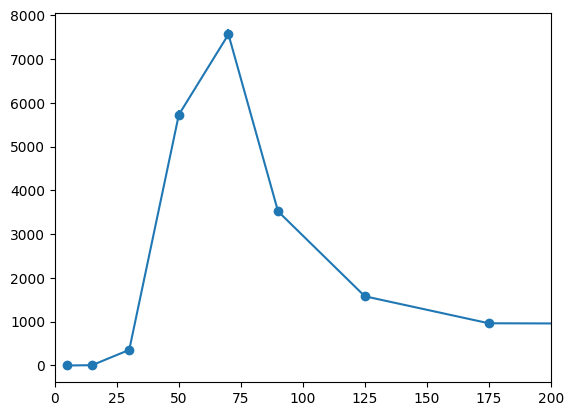

In [86]:
plt.errorbar( mgen_center, bin_avg[34: 43], bin_rms[34: 43], marker = 'o')
plt.xlim(0,200)

In [235]:
canvs = []
hists = []
hcopy_list = []
i = 2
for ipt in range(i,i+1): 
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    
    for i_jk in range(10):
        hcopy_list.append(ROOT.TH1F("unfolded_pt" + str(ipt)+str(i_jk), "Unfolded Ungroomed Jet Mass for p_{T} " + "  "+  str(i_jk)+ str(ptbinsGen[ipt+1])[:-2] +" - " +str(ptbinsGen[ipt+2])[:-2] +' GeV', nmbinsGen, mbinsGen ))
        m_int = 0
        for im in range(nmbinsGen):
            #print(im + ipt*(nmbinsGen+2) + 2)
            # print("mass ", mgen_center[im])
            # print("pt " , ptgen_center[ipt])

            bin_number = signalBinning.GetGlobalBinNumber(mgen_center[im], ptgen_center[ipt])

            m_int = m_int + o_list[i].GetBinContent(bin_number)
        for im in range(nmbinsGen):
            #print(im + ipt*(nmbinsGen+2) + 2)
            # print("mass ", mgen_center[im])
            # print("pt " , ptgen_center[ipt])

            bin_number = signalBinning.GetGlobalBinNumber(mgen_center[im], ptgen_center[ipt])
            if (m_int>0):
                hcopy_list[i_jk].SetBinContent(im+1, o_list[i_jk].GetBinContent(bin_number )/(mgen_width[im]*m_int) )
        hcopy_list[i_jk].SetLineColor(i_jk)
        hcopy_list[i_jk].GetXaxis().SetRangeUser(0,200)
        hcopy_list[i_jk].Draw('hist same')
    ci.Draw()








    

In [230]:
%jsroot

In [231]:
c = ROOT.TCanvas()
for h in hcopy_list:
    h.Draw('hist same')
c.Draw()   

Normalized Response Matrix Row Sums: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


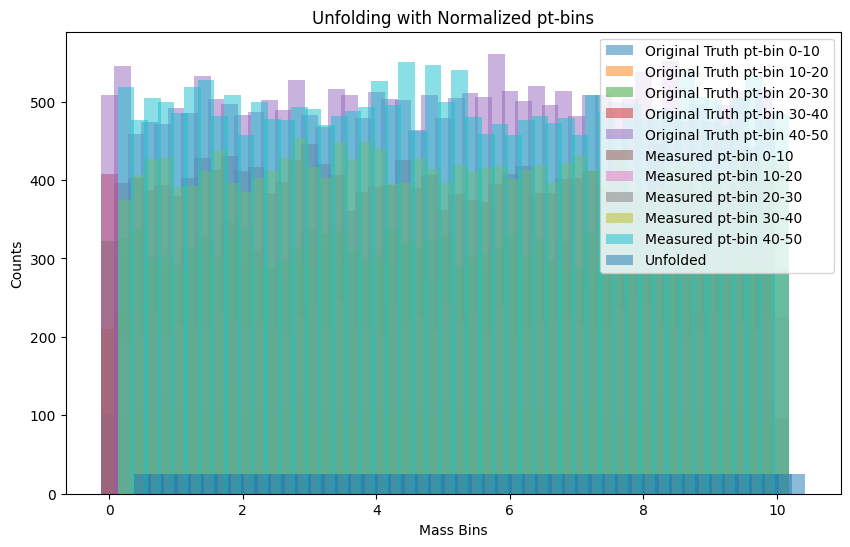

Original Truth Distribution: [array([101, 103,  98,  98, 127, 109, 102,  82,  99,  86, 101,  93,  99,
       103, 121,  96, 106, 105,  91,  94, 102,  91, 104,  99,  88, 105,
        90, 110, 111, 107,  93,  94,  94,  80, 102, 101, 102,  94,  87,
        94, 102, 111, 105,  92, 103,  98, 106, 110, 114, 114]), array([210, 234, 197, 207, 205, 182, 203, 203, 206, 221, 197, 214, 183,
       184, 181, 214, 196, 208, 209, 210, 201, 186, 213, 193, 209, 184,
       203, 227, 201, 210, 196, 210, 188, 171, 192, 195, 207, 201, 207,
       192, 204, 205, 190, 208, 231, 189, 201, 187, 195, 190]), array([322, 301, 311, 303, 279, 293, 314, 327, 303, 346, 286, 309, 289,
       266, 292, 336, 307, 289, 306, 292, 300, 293, 318, 300, 273, 327,
       291, 295, 278, 312, 315, 270, 309, 296, 322, 288, 263, 287, 309,
       289, 282, 264, 315, 287, 304, 293, 298, 316, 301, 304]), array([408, 396, 402, 387, 394, 380, 402, 428, 413, 431, 412, 416, 384,
       398, 425, 446, 420, 407, 360, 385, 391, 394, 426, 3

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate example data (truth and measured distributions)
np.random.seed(0)  # For reproducibility

# Known truth distribution
pt_bins = np.array([0, 10, 20, 30, 40, 50])
mass_bins = np.linspace(0, 10, 51)  # Mass bins for each pt bin

# Example truth distributions for each pt-bin
truth_distributions = [np.random.poisson(lam=(i+1)*100, size=len(mass_bins)-1) for i in range(len(pt_bins)-1)]

# Normalize each pt-bin for truth distributions
normalized_truth_distributions = [truth / truth.sum() for truth in truth_distributions]

# Simulate measured data with some noise
measured_distributions = [np.random.poisson(lam=(i+1)*100 + np.random.normal(0, 10), size=len(mass_bins)-1) for i in range(len(pt_bins)-1)]

# Normalize each pt-bin for measured distributions
normalized_measured_distributions = [measured / measured.sum() for measured in measured_distributions]

# Combine normalized data into single arrays for 2D histogram
mass_data_truth = np.concatenate([mass_bins[:-1] for _ in range(len(pt_bins)-1)])
mass_data_measured = np.concatenate([mass_bins[:-1] for _ in range(len(pt_bins)-1)])
truth_data = np.concatenate([np.repeat(pt_bins[i], len(mass_bins)-1) for i in range(len(pt_bins)-1)])
measured_data = np.concatenate([np.repeat(pt_bins[i], len(mass_bins)-1) for i in range(len(pt_bins)-1)])

# Step 2: Create and fill the 2D histogram (response matrix)
response_matrix, xedges, yedges = np.histogram2d(
    np.concatenate([mass_data_truth for _ in range(len(pt_bins)-1)]),
    np.concatenate([mass_data_measured for _ in range(len(pt_bins)-1)]),
    bins=(mass_bins, mass_bins)
)

# Normalize the response matrix (row-wise)
row_sums = response_matrix.sum(axis=1, keepdims=True)
normalized_response_matrix = response_matrix / row_sums

# Verify normalization
print("Normalized Response Matrix Row Sums:", normalized_response_matrix.sum(axis=1))  # Should print an array of ones

# Step 3: Fill 1D histograms for truth and measured distributions
truth_hist, _ = np.histogram(np.concatenate([mass_data_truth for _ in range(len(pt_bins)-1)]), bins=mass_bins)
measured_hist, _ = np.histogram(np.concatenate([mass_data_measured for _ in range(len(pt_bins)-1)]), bins=mass_bins)

# Step 4: Unfold the measured distribution
pseudo_inverse_response_matrix = np.linalg.pinv(normalized_response_matrix)
unfolded_hist = pseudo_inverse_response_matrix.dot(measured_hist)

# Step 5: Denormalize the unfolded distribution
denormalized_unfolded_hist = unfolded_hist * measured_hist.sum() / unfolded_hist.sum()

# Plot the distributions for comparison
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.25  # Width of the bars

# Plot the original truth distributions
for i, truth in enumerate(truth_distributions):
    ax.bar(mass_bins[:-1], truth, width, label=f'Original Truth pt-bin {pt_bins[i]}-{pt_bins[i+1]}', alpha=0.5)

# Plot the measured distributions
for i, measured in enumerate(measured_distributions):
    ax.bar(mass_bins[:-1] + width, measured, width, label=f'Measured pt-bin {pt_bins[i]}-{pt_bins[i+1]}', alpha=0.5)

# Plot the unfolded distributions
ax.bar(mass_bins[:-1] + 2 * width, denormalized_unfolded_hist, width, label=f'Unfolded', alpha=0.5)

ax.set_xlabel('Mass Bins')
ax.set_ylabel('Counts')
ax.set_title('Unfolding with Normalized pt-bins')
ax.legend()

plt.show()

# Print the distributions for clarity
print("Original Truth Distribution:", truth_distributions)
print("Measured Distribution:", measured_distributions)
print("Unfolded Distribution:", denormalized_unfolded_hist)


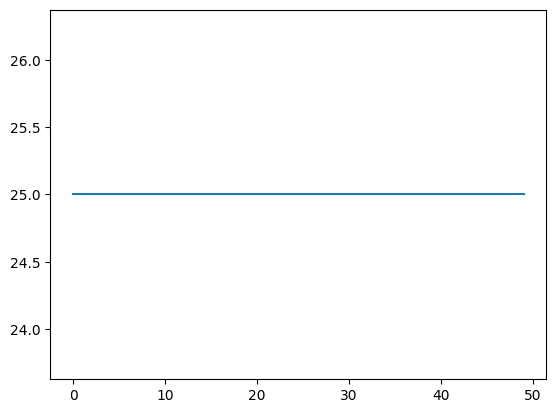

In [109]:
plt.plot(truth_hist)